In [2]:
!pip install seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7e/ab/ea76361f9d3e732e114adcd801d2820d5319c23d0ac5482fa3b412db217e/pandas-0.25.1-cp37-cp37m-manylinux1_x86_64.whl


In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import glob
import seaborn as sns
#import xarray as xr
import cartopy as cp
save_dir = '/uio/hume/student-u89/hannasv/Desktop/figures_MASTERTHESIS/'
save_dir = '/home/hanna/images_simple_statsmodels/'

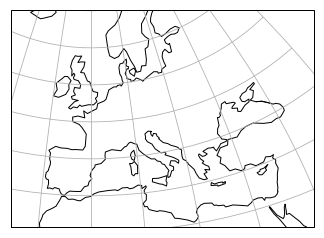

In [2]:
# NOT USE THIS 
ax = plt.axes(projection=ccrs.TransverseMercator())
ax.coastlines()
ax.gridlines()
ax.set_extent([-15, 40, 30, 60])
#gl = ax.gridlines(crs=ccrs.TransverseMercator(central_longitude=0.0, central_latitude=0.0, false_easting=0.0, false_northing=0.0, scale_factor=1.0), draw_labels=True,
#                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

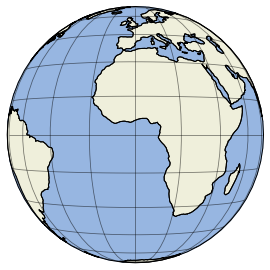

In [5]:
# Eumetsat 36 000km.
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=0.0, satellite_height=35785831, 
                   false_easting=0, false_northing=0, globe=None))
ax.coastlines()
ax.gridlines(color='black', alpha=0.5)
ax.add_feature(cp.feature.OCEAN, zorder=0)
ax.add_feature(cp.feature.LAND, zorder=0, edgecolor='black')
#ax.set_extent([-15, 29.25, 30, 55.25-0.75])
#ax.set_title('Domain')
plt.subplots_adjust(left=0.01, bottom=0.01, right=0.9, top=0.9, wspace=0.1, hspace=0.1)
plt.savefig(save_dir+"view_satellite.png", bbox_inches='tight')

In [ ]:
# crop_nc_file(fil, fil[:-3]+"_cropped.nc")
def create_seasonal_files(infile):
    W = xr.open_dataset(infile)
    for i, season in enumerate(W.groupby('time.season')):
        key, dataset = season
        outfile = infile[:-3]+"_{}.nc".format(key)
        dataset.to_netcdf(path = outfile)
        #cropped.to_netcdf(path = outfile)
    return 

Resolution in era interim files. Lets do this for 

In [9]:
np.arange(-15, 30, 0.75) # len 60

array([-15.  , -14.25, -13.5 , -12.75, -12.  , -11.25, -10.5 ,  -9.75,
        -9.  ,  -8.25,  -7.5 ,  -6.75,  -6.  ,  -5.25,  -4.5 ,  -3.75,
        -3.  ,  -2.25,  -1.5 ,  -0.75,   0.  ,   0.75,   1.5 ,   2.25,
         3.  ,   3.75,   4.5 ,   5.25,   6.  ,   6.75,   7.5 ,   8.25,
         9.  ,   9.75,  10.5 ,  11.25,  12.  ,  12.75,  13.5 ,  14.25,
        15.  ,  15.75,  16.5 ,  17.25,  18.  ,  18.75,  19.5 ,  20.25,
        21.  ,  21.75,  22.5 ,  23.25,  24.  ,  24.75,  25.5 ,  26.25,
        27.  ,  27.75,  28.5 ,  29.25])

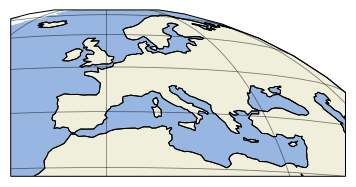

In [4]:
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=0.0, satellite_height=35785831, 
                   false_easting=0, false_northing=0, globe=None))

ax.coastlines()
ax.gridlines(color='black', alpha=0.5)
ax.add_feature(cp.feature.OCEAN, zorder=0)
ax.add_feature(cp.feature.LAND, zorder=0, edgecolor='black')
ax.set_extent([-15, 42, 30, 75])
#ax.set_title('Europe viewed from 0 degree service')
#plt.subplots_adjust(left=0.01, bottom=0.01, right=0.9, top=0.9, wspace=0.1, hspace=0.1)
plt.savefig(save_dir+"Europed_view_from_0_degree_service.png", bbox_inches='tight')

In [6]:
save_dir = '/home/hanna/images_simple_statsmodels/'

In [10]:
start = "2012-01-01"
stop = "2018-01-01"
#glob.glob(era_path + "*_all_cropped.nc")
era_path = '/home/hanna/lagrings/era_interim_data/'
q   = xr.open_dataset(glob.glob(era_path + '*_q_all_cropped.nc')[0]).sel(time = slice(start, stop)).mean('time')
r   = xr.open_dataset(glob.glob(era_path + "*_r_all_cropped.nc")[0]).sel(time = slice(start, stop)).mean('time')
tcc = xr.open_dataset(glob.glob(era_path + "*_tcc_all_cropped.nc")[0]).sel(time = slice(start, stop)).mean('time')
sp  = xr.open_dataset(glob.glob(era_path + "*_sp_all_cropped.nc")[0]).sel(time = slice(start, stop)).mean('time')
t2m = xr.open_dataset(glob.glob(era_path + "*_t2m_all_cropped.nc")[0]).sel(time = slice(start, stop)).mean('time')

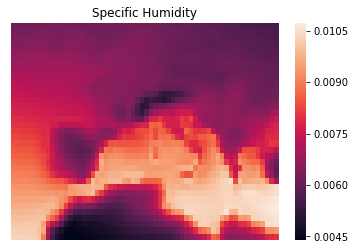

In [35]:
ax = sns.heatmap(q.q.values)
ax.set_title('Specific Humidity')
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(['', '', '', ''])
ax.set_yticklabels(['', '', '', ''])
#ax.cbar(False)
plt.savefig(save_dir + 'mean_specific_humidities.png', bbox_inches='tight')

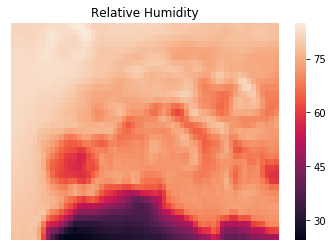

In [30]:
ax = sns.heatmap(r.r.values)
ax.set_title('Relative Humidity')
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(['', '', '', ''])
ax.set_yticklabels(['', '', '', ''])
#ax.cbar(False)
plt.savefig(save_dir + 'mean_relative_humidities.png', bbox_inches='tight')

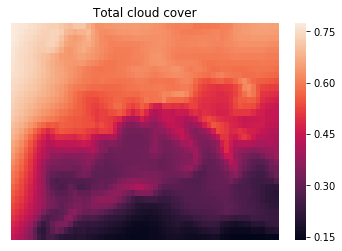

In [29]:
ax = sns.heatmap(tcc.tcc.values)
ax.set_title('Total cloud cover')
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(['', '', '', ''])
ax.set_yticklabels(['', '', '', ''])
#ax.cbar(False)
plt.savefig(save_dir + 'mean_total_cover.png', bbox_inches='tight')

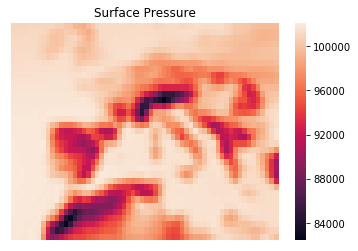

In [32]:
ax = sns.heatmap(sp.sp.values)
ax.set_title('Surface Pressure')
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(['', '', '', ''])
ax.set_yticklabels(['', '', '', ''])
#ax.cbar(False)
plt.savefig(save_dir + 'mean_surface_pressure.png', bbox_inches='tight')

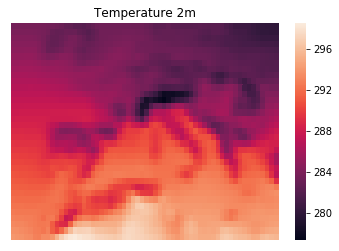

In [34]:
ax = sns.heatmap(t2m.t2m.values)
ax.set_title('Temperature 2m')
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(['', '', '', ''])
ax.set_yticklabels(['', '', '', ''])
#ax.cbar(False)
plt.savefig(save_dir + 'mean_temperature_2_meter.png', bbox_inches='tight')

In [ ]:
def load_data(start = "2012-01-01", stop = "2018-01-01", lat_idx = 15, lon_idx = 30):
    #glob.glob(era_path + "*_all_cropped.nc")
    era_path = '/home/hanna/lagrings/era_interim_data/'
    assert len(glob.glob(era_path + "*_q_all_cropped.nc")), "no data run cnct_lh in bash"
    q   = xr.open_dataset(glob.glob(era_path + '*_q_all_cropped.nc')[0]).sel(time = slice(start, stop)).q.values
    r   = xr.open_dataset(glob.glob(era_path + "*_r_all_cropped.nc")[0]).sel(time = slice(start, stop)).r.values
    tcc = xr.open_dataset(glob.glob(era_path + "*_tcc_all_cropped.nc")[0]).sel(time = slice(start, stop)).tcc.values
    sp  = xr.open_dataset(glob.glob(era_path + "*_sp_all_cropped.nc")[0]).sel(time = slice(start, stop)).sp.values
    t2m = xr.open_dataset(glob.glob(era_path + "*_t2m_all_cropped.nc")[0]).sel(time = slice(start, stop)).t2m.values
    assert np.shape(q) == np.shape(r) == np.shape(tcc) == np.shape(sp) == np.shape(t2m)
    
    nbr_times, nbr_lats, nbr_lon = np.shape(q)
    
    train = []
    true  = tcc[:,lat_idx, lon_idx]

    for i in range(nbr_times):
        one_timestep = np.array([q[i][lat_idx][lon_idx], r[i][lat_idx][lon_idx], 
                                 sp[i][lat_idx][lon_idx], t2m[i][lat_idx][lon_idx]])
                                 
        train.append(one_timestep)

    return np.array(train), true

In [49]:
def create_ML_repo(start = "2012-01-01", stop = "2019-01-01", season = "SON", 
                  era_path = '/uio/lagringshotell/geofag/students/metos/hannasv/era_interim_data/'):
    """
    Want all year put season to "".
    """
    q   = xr.open_dataset(glob.glob(era_path + "*_q_*" + season +".nc")[0]).q.values
    r   = xr.open_dataset(glob.glob(era_path + "*_r_*"+ season +".nc")[0]).r.values
    tcc = xr.open_dataset(glob.glob(era_path + "*tcc*"+ season +".nc")[0]).tcc.values
    sp  = xr.open_dataset(glob.glob(era_path + "*sp*"+ season +".nc")[0]).sp.values
    t2m = xr.open_dataset(glob.glob(era_path + "*t2m*"+ season +".nc")[0]).t2m.values
    assert np.shape(q) == np.shape(r) == np.shape(tcc) == np.shape(sp) == np.shape(t2m)
    
    nbr_times, nbr_lats, nbr_lon = np.shape(q)
    train = []
    true  = tcc
    for i in range(nbr_times):
        one_timestep = np.array([q[i], r[i], tcc[i], t2m[i] ])
        #print(one_timestep.shape)
        train.append(one_timestep)
    return np.array(train), true

In [50]:
train, test = create_ML_repo()

In [52]:
train.shape, test.shape

((2184, 4, 35, 60), (2184, 35, 60))

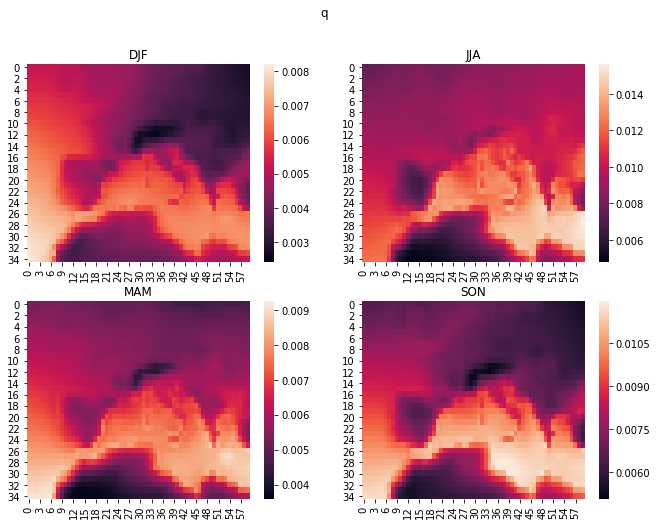

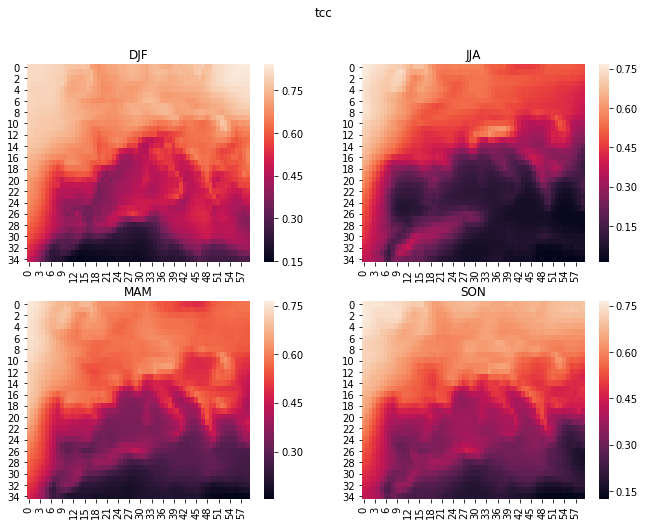

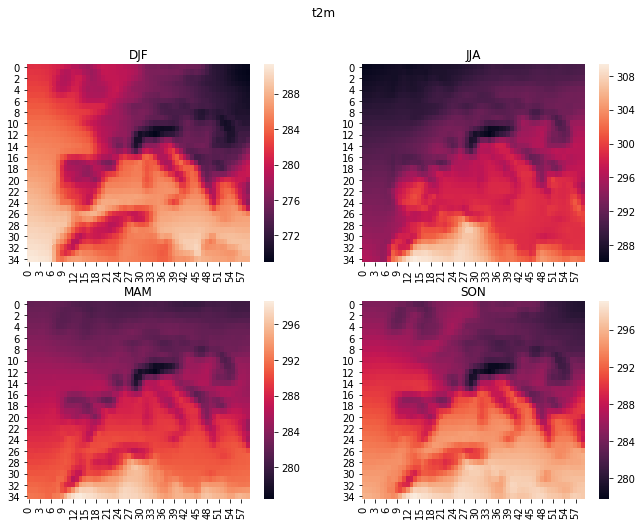

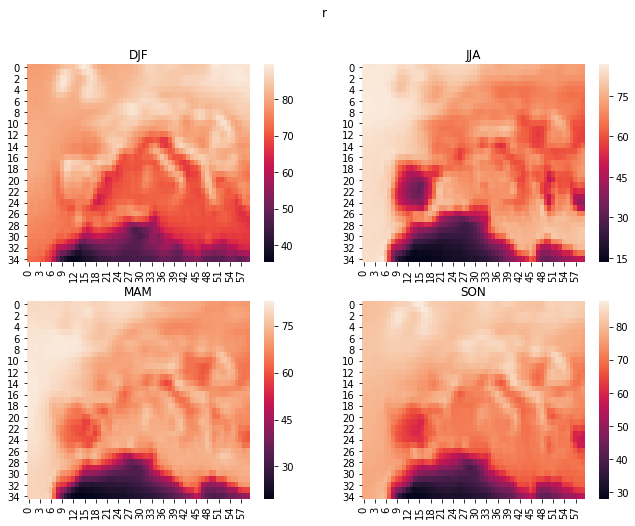

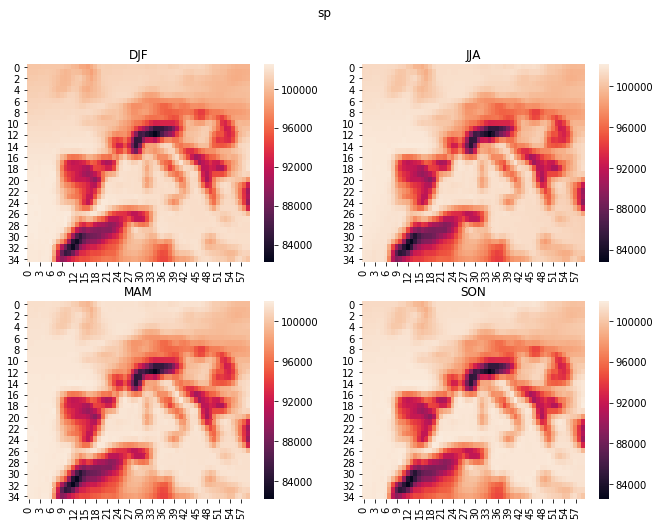

In [141]:
for f in cropped_files:
    
    W = xr.open_dataset(f)
    variable = f.split('_')[-3] 
    fig, axes = plt.subplots(2,2)
    fig.set_size_inches(11,8)
    fig.suptitle(variable)

    axes = axes.flatten()
    #print((ax1, ax2, ax3, ax4))
    for i, season in enumerate(W.groupby('time.season')):
        key, dataset = season
        #print(dataset.mean('time')[variable].values)
        sns.heatmap(dataset.mean('time')[variable].values, ax = axes[i])
        axes[i].set_title(key)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)    